In [1]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = r'C:\Users\IRLXB03\Desktop\Respositories\2\Expected_recovery\Data_base.xlsx'

In [2]:
df = pd.read_excel(file_path)
df

,Date,Ticker,PX_ASK,PX_LAST,PX_BID
0,2020-12-30,DICY,53.583,52.833,52.083
1,2020-12-29,DICY,53.583,52.833,52.083
2,2020-12-28,DICY,53.536,52.861,52.186
3,2020-12-24,DICY,53.583,52.833,52.083
4,2020-12-23,DICY,53.583,52.833,52.083
...,...,...,...,...,...
2921,2015-04-07,DICA,95.854,96.170,96.485
2922,2015-04-06,DICA,95.195,95.648,96.101
2923,2015-04-03,DICA,95.143,95.664,96.184
2924,2015-04-02,DICA,95.222,95.734,96.245


In [3]:
# Plotting the spread
start_date = '2016-05-23'
end_date = '2020-08-31'


df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Drop rows with any NaN values
df = df.dropna()

# Pivot the DataFrame
df_pivot = df.pivot(index='Date', columns='Ticker', values=['PX_ASK', 'PX_LAST', 'PX_BID'])

# Flatten the MultiIndex columns
df_pivot.columns = ['_'.join(col) for col in df_pivot.columns]

# Reset index to have 'Date' as a regular column
df_pivot = df_pivot.reset_index()

df_pivot = df_pivot.rename(columns={
    'PX_ASK_DICA ': 'PX_ASK_DICA',
    'PX_BID_DICA ': 'PX_BID_DICA',
    'PX_LAST_DICA ': 'PX_LAST_DICA',
})

# Compute the spread:

df_pivot['Price_Spread'] = (df_pivot['PX_LAST_DICY'] - df_pivot['PX_LAST_DICA']) / df_pivot['PX_LAST_DICA'] * 100
df_pivot['BA_Spread'] = (((df_pivot['PX_BID_DICY'] - df_pivot['PX_ASK_DICY']) / df_pivot['PX_ASK_DICY']) - ((df_pivot['PX_BID_DICA'] - df_pivot['PX_ASK_DICA']) / df_pivot['PX_ASK_DICA'])) 
df_pivot = df_pivot.dropna()
# Export df_pivot to excel
#df_pivot.to_excel(r'C:\Users\belmu\OneDrive\Documentos\UMN\ThirdYear\Research_Ideas\Expected_recovery\df_pivot.xlsx', index = False)

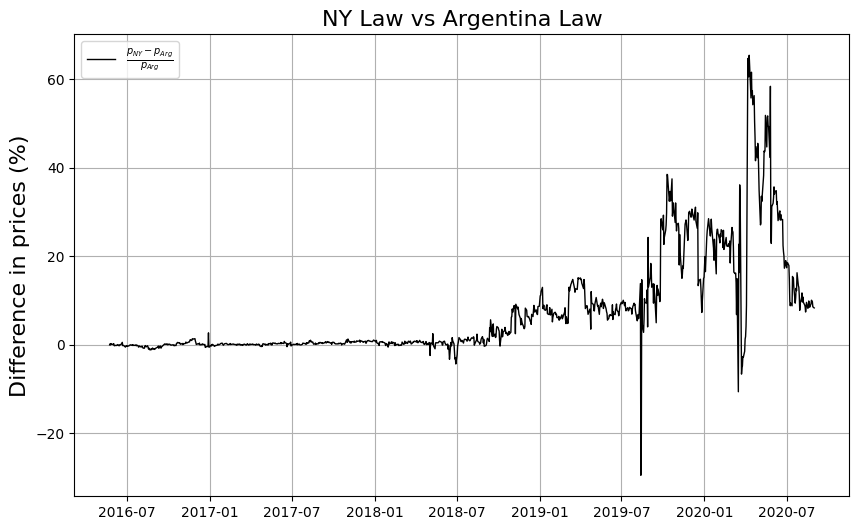

In [4]:

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(df_pivot['Date'], df_pivot['Price_Spread'], label=r'$\frac{p_{NY} - p_{Arg}}{p_{Arg}}$', color='black', linewidth=1)
plt.title('NY Law vs Argentina Law',fontsize=16)    
plt.ylabel('Difference in prices (%)',fontsize=16)  
plt.legend()
plt.grid(True)
plt.savefig("Historical_spread.jpg")
plt.show()

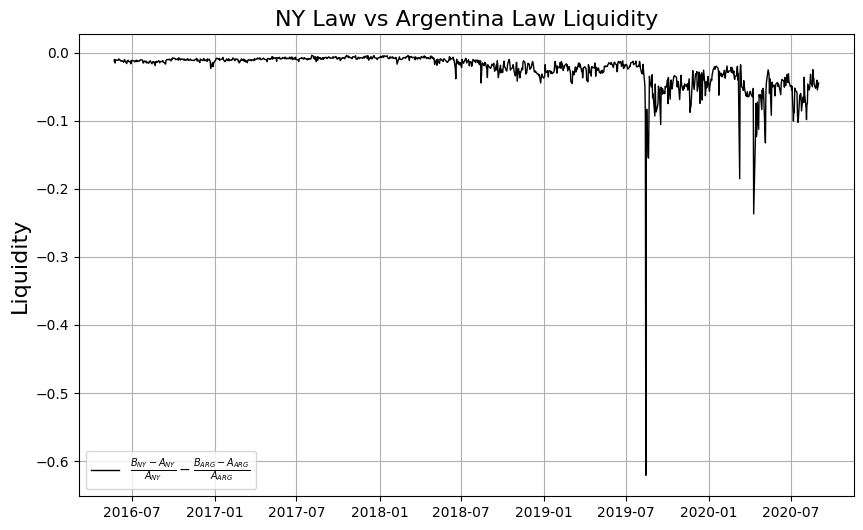

In [5]:
# Plotting the bid_ask spread difference
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(df_pivot['Date'], df_pivot['BA_Spread'], label=r'$\frac{B_{NY} - A_{NY}}{A_{NY}} - \frac{B_{ARG} - A_{ARG}}{A_{ARG}}$', color='black', linewidth=1)
plt.title('NY Law vs Argentina Law Liquidity',fontsize=16) 
plt.ylabel('Liquidity',fontsize=16)  
plt.legend()
plt.grid(True)
plt.savefig("Liquidity.jpg")
plt.show()

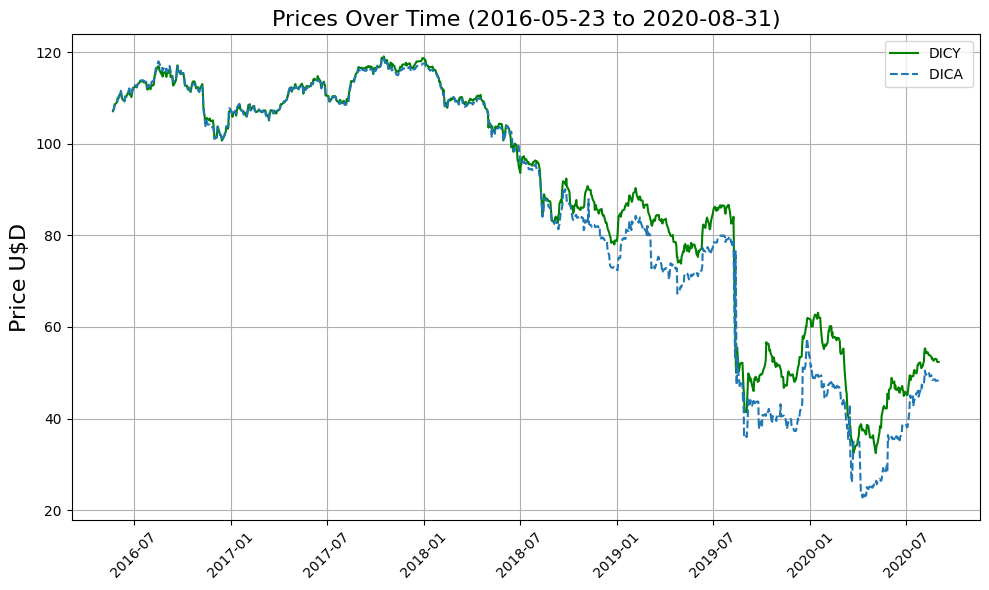

In [6]:
start_date = '2016-05-23'
end_date = '2020-08-31'

# Filter the DataFrame for the desired date range
interval_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

fig, ax = plt.subplots(figsize=(10, 6))

i = 0
for ticker in interval_data['Ticker'].unique():
    if (i==0):
        ticker_data = interval_data[interval_data['Ticker'] == ticker]
        #plt.plot(ticker_data['Date'], ticker_data['PX_ASK'], label='Ask')
        #plt.plot(ticker_data['Date'], ticker_data['PX_BID'], label='Bid')
        plt.plot(ticker_data['Date'], ticker_data['PX_LAST'], label=f'{ticker}', color='green',)
        i = 1
    else:
        ticker_data = interval_data[interval_data['Ticker'] == ticker]
        #plt.plot(ticker_data['Date'], ticker_data['PX_ASK'], label='Ask')
        #plt.plot(ticker_data['Date'], ticker_data['PX_BID'], label='Bid')
        plt.plot(ticker_data['Date'], ticker_data['PX_LAST'], label=f'{ticker}', linestyle='dashed')
        

# Set labels and legend
plt.title(f'Prices Over Time ({start_date} to {end_date})',fontsize=16)  

plt.ylabel('Price U$D',fontsize=16)  
plt.legend()

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.savefig("Historical_prices.jpg")
plt.show()

